Análisis sobre el archivo **'Data.csv'** con el fin de aplicar el algoritmo de **Regresión Lineal Múltiple**. Se pretende predecir el valor de ventas (**Sales**) a partir de variables independientes a tener en cuenta luego de analizar gráficamente el comportamiento de los datos.  
Para este análisis se usan las librerías pandas, numpy, matplotlib y seaborn para el procesado y representación de los datos  

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('csv/Data.csv')
df.shape

(4572, 5)

Dicho archivo consta de 4572 filas y 5 columnas.  
A continuación se previsualizan las primeras 10 filas del DataFrame: 

In [2]:
df.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
5,29.0,9.614382,1.027163,Mega,105.889148
6,55.0,24.893811,4.273602,Micro,198.679825
7,31.0,17.355042,2.289855,Nano,108.733932
8,76.0,24.648898,7.130116,Macro,270.189400
9,13.0,0.431128,2.229423,Mega,48.280582


Las columnas de **TV**, **Radio** y **Social Media** dan un indicio de niveles de audencia y la columna de **Influencer** sobre el nivel de popularidad de la persona. **Sales** representa las ventas totales que tuvo esa persona.  

# Limpieza y Tratamiento de Datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 160.8+ KB


Al ver la información detallada, se observan valores numéricos (float64) para las columnas de **TV**, **Radio**, **Social Media** y **Sales**, mientras que la columna de **Influencer** se presenta en formato de texto (object).   
Por otra parte, la columna **TV** indica que tiene 4562 datos no nulos. Como el total de filas eran de 4572, en la siguiente línea de código calculamos cuántos valores de cada columna son nulos para poder tratarlos posteriormente. 

In [4]:
print(df.isnull().sum()) 

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64


Tanto **TV** como **Radio**, **Social Media** y **Sales** poseen datos nulos.  
Para tratar estos datos, aplico el método 'ffill' cuyo objetivo es el de propagar el último valor no nulo observado hacia adelante hasta que se encuentra otro valor no nulo. Por lo tanto, a esos valores nulos, en vez de eliminar el registro, se coloca el valor numérico de la fila anterior para no perder los datos de ese registro.

In [5]:
df = df.fillna(method='ffill')
print(df.isnull().sum()) 

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64


Una vez que todas las columnas tienen datos no nulos, se detallan valores estadísticos de las columnas numéricas del DataFrame

In [6]:
df.describe()

,TV,Radio,Social Media,Sales
count,4572.000000,4572.000000,4572.000000,4572.000000
mean,54.064304,18.155924,3.325938,192.512502
std,26.121810,9.677381,2.215048,93.121494
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.517464,1.528262,112.397660
50%,53.000000,17.851910,3.055565,189.231172
75%,77.000000,25.649730,4.810455,272.549133
max,100.000000,48.871161,13.981662,364.079751


El valor a tener en cuenta es la media (mean) de la columna **Sales** que es **192.5152**. Este valor va a ser comparado al final del análisis con el **RMSE**.  

# Comportamiento de los datos

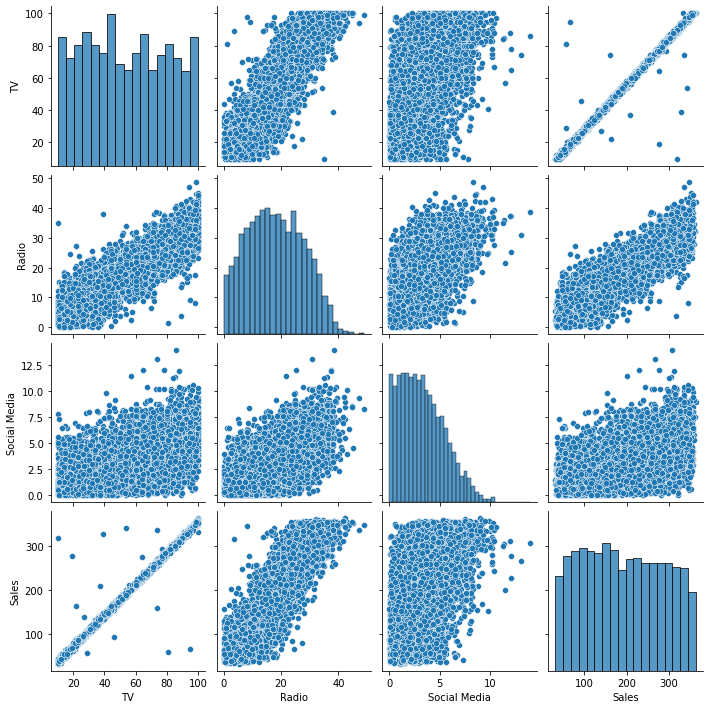

In [7]:
g = sns.pairplot(df)

Se observa que la relación entre **TV** y **Sales** tienen un comportamiento lineal casi perfecto y **Radio** vs **Sales** comparte una relación lineal pero con mayor dispersión de datos. Se podría hacer una Regresión Lineal Simple como variable independiente **TV**, pero para este caso voy a tener en cuenta **TV** y **Radio** para realizar una Regresión Lineal Múltiple.  
Para eso, filtro las columnas de interés del DataFrame

In [8]:
df = df[['TV','Radio','Sales']]
df.head()

,TV,Radio,Sales
0,16.0,6.566231,54.732757
1,13.0,9.237765,46.677897
2,41.0,15.886446,150.177829
3,83.0,30.020028,298.246340
4,15.0,8.437408,56.594181


# División y Procesamiento de Datos

En la variable **X** guardo las Variables Independientes que **TV** y **Radio**. La última columna de **Sales** se va a guardar en **y**, Variable Independiente que queremos predecir.

In [9]:
X = df.iloc[:, :-1].values 
y = df.iloc[:,2].values 

# Regresión Lineal Múltiple  
Divido el 80% de los datos para el conjunto de entrenamiento y el 20% de los datos al conjunto de pruebas:

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Entrenamos el algoritmo con los datos:

In [11]:
reg = LinearRegression() 
reg.fit(X_train, y_train)

LinearRegression()

# Coeficientes

Elimino la última columna del DataFrame original para luego invertirlo y agregarle la columna de coeficientes. Esto nos da una idea de cuánto peso tiene cada variable sobre el resultado final de predicción

In [12]:
df = df.drop(['Sales'], axis=1)
df = df.T
df = df.index

coeff_df = pd.DataFrame(reg.coef_, df, columns=['Coeficientes']) 
coeff_df

,Coeficientes
TV,3.440236
Radio,0.329184


Los resultados indican que para un aumento de una unidad en **TV**, hay un aumento de **3.44** unidades en el valor de **Sales**. Podemos ver que el coeficiente de **Radio** tiene muy poca influencia en el resultado final.   
Predicción sobre los datos de la prueba:

In [13]:
y_pred = reg.predict(X_test)

# Comparación de valores <a id="comparacion"></a>

Creo un DataFrame para comparar los valores actuales y predecidos. Muestro los primeros 20 valores

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predecidos': y_pred})
df1 = df.head(25)
df1

,Actual,Predecidos
0,157.656160,161.065408
1,264.592233,264.911727
2,298.882343,298.897894
3,298.639410,297.574068
4,80.940725,73.316003
5,37.745951,38.988060
6,320.883144,318.731700
7,317.866489,318.941607
8,44.338811,44.453789
9,75.883453,75.244764


# Representación de los valores actuales y predecidos <a id="representacion"></a>

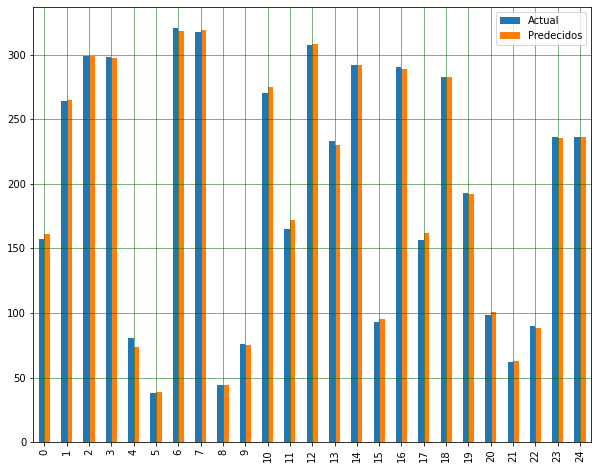

In [15]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='darkgreen')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Cálculo de Errores

In [16]:
print('Error Medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred)) 
print('Error Cuadrático Medio (MSE):', metrics.mean_squared_error(y_test, y_pred)) 
print('Raíz Cuadrada del Error Cuadrático Medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Medio Absoluto (MAE): 2.805668097543683
Error Cuadrático Medio (MSE): 23.52093726631555
Raíz Cuadrada del Error Cuadrático Medio (RMSE): 4.849838890758697


# Conclusión:  
Luego de [comparar](#comparacion) y [representar gráficamente](#representacion) los datos obtenidos, se puede observar que no difieren en un rango amplio sino que resultan ser muy parecidos los valores que teníamos a los predecidos.
Esto es debido a que el **RMSE** del modelo es de **4.8498** siendo un valor mucho menor que el **10%** de la media de **Sales** que es de **192.466** (valor tenido en cuenta desde un inicio), esto indica una buena precisión en la predicción.  
Con este algoritmo de Machine Learning se podría desarollar un programa donde el objetivo sería pasarle valores de niveles de audiencia en TV y Radio y el mismo programa muestre un valor aproximado que se va a lograr en Ventas.  
Test:

In [17]:
reg.predict([[55, 24.9], [52, 20]])

array([198.02634915, 186.09263742])

Se pasan valores de 2 personas distintas, el primero tiene un valor de 55 en **TV** y de 24.9 en **Radio** obteniendo un valor en **Sales** de 198.03.  
La segunda persona posee 52 en **TV** y 20 en **Radio** obteniendo un valor de **Sales** en 186.09